In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4.5)

**Implementation of extracting Countries from the main dataset**

In [3]:
class CountryDataExtractor:

    def __init__(self, dataset):
        self.dataset = dataset

    def extractCountry(self, countryCode):
        return self.dataset[self.dataset["iso_code"] == countryCode]

# **Reading Datasets (CovidData & Sentiments):**

In [4]:
#owid-covid-data
owid_covid_data = pd.read_csv('/content/drive/MyDrive/PMDSPorject/owid-covid-data.csv')
owid_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187092,ZWE,Africa,Zimbabwe,2022-05-12,248943.0,301.0,127.571,5481.0,0.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187093,ZWE,Africa,Zimbabwe,2022-05-13,249131.0,188.0,131.000,5482.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187094,ZWE,Africa,Zimbabwe,2022-05-14,249206.0,75.0,141.714,5482.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187095,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
#choosing the country
cde = CountryDataExtractor(owid_covid_data)
covidData = cde.extractCountry("GBR")
covidData = covidData[covidData["date"].between('2020-03-30' , '2021-12-30')] #we can't compute seasonality starting sooner than 2020-03-30
covidData

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
175497,GBR,Europe,United Kingdom,2020-03-30,34080.0,4281.0,3053.286,2053.0,376.0,241.286,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
175498,GBR,Europe,United Kingdom,2020-03-31,38598.0,4518.0,3358.571,2456.0,403.0,277.714,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
175499,GBR,Europe,United Kingdom,2020-04-01,43536.0,4938.0,3679.143,3128.0,672.0,346.429,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
175500,GBR,Europe,United Kingdom,2020-04-02,48432.0,4896.0,3937.429,3785.0,657.0,414.429,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
175501,GBR,Europe,United Kingdom,2020-04-03,53356.0,4924.0,4181.000,4522.0,737.0,478.429,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176133,GBR,Europe,United Kingdom,2021-12-26,12156156.0,119366.0,110411.571,147982.0,3.0,93.429,...,20.0,24.7,NaN,2.54,81.32,0.932,136447.2,11.22,10.98,2000.48341
176134,GBR,Europe,United Kingdom,2021-12-27,12263927.0,107771.0,112675.714,148125.0,143.0,107.714,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
176135,GBR,Europe,United Kingdom,2021-12-28,12402073.0,138146.0,119661.000,148144.0,19.0,85.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
176136,GBR,Europe,United Kingdom,2021-12-29,12584985.0,182912.0,130705.000,148202.0,58.0,74.143,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN


In [6]:
sentimentsUK = pd.read_csv('/content/drive/MyDrive/PMDSPorject/sentimentsGB.csv')
sentimentsUK = sentimentsUK[sentimentsUK["day"].between('2020-03-30' , '2021-12-30')]
sentimentsUK

,day,timestamp,date,lang,text,day.1,text_modified,sentiment,negPercentage,netPercentage,posPercentage
38,2020-03-30,57,57,57,57,57,57,57,0.263158,0.368421,0.368421
39,2020-03-31,70,70,70,70,70,70,70,0.157143,0.542857,0.300000
40,2020-04-01,98,98,98,98,98,98,98,0.122449,0.459184,0.418367
41,2020-04-02,101,101,101,101,101,101,101,0.297030,0.455446,0.247525
42,2020-04-03,83,83,83,83,83,83,83,0.156627,0.566265,0.277108
...,...,...,...,...,...,...,...,...,...,...,...
674,2021-12-26,26,26,26,26,26,26,26,0.307692,0.384615,0.307692
675,2021-12-27,40,40,40,40,40,40,40,0.250000,0.500000,0.250000
676,2021-12-28,36,36,36,36,36,36,36,0.166667,0.555556,0.277778
677,2021-12-29,64,64,64,64,64,64,64,0.265625,0.500000,0.234375


# **Sentiments Seasonality:**

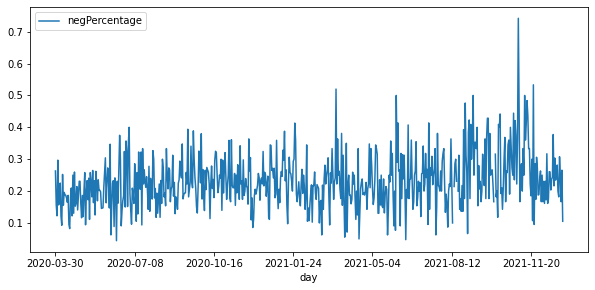

In [7]:
sentimentsUK.plot('day', 'negPercentage')

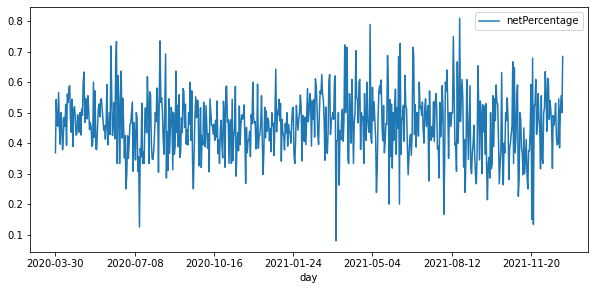

In [8]:
sentimentsUK.plot('day', 'netPercentage')

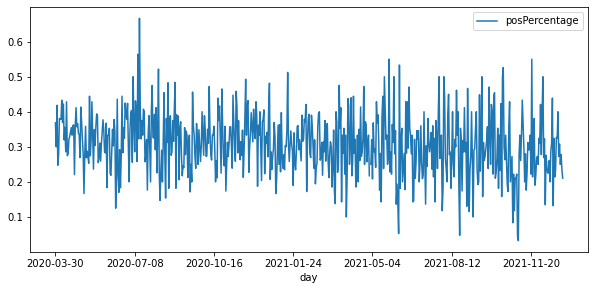

In [9]:
sentimentsUK.plot('day', 'posPercentage')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


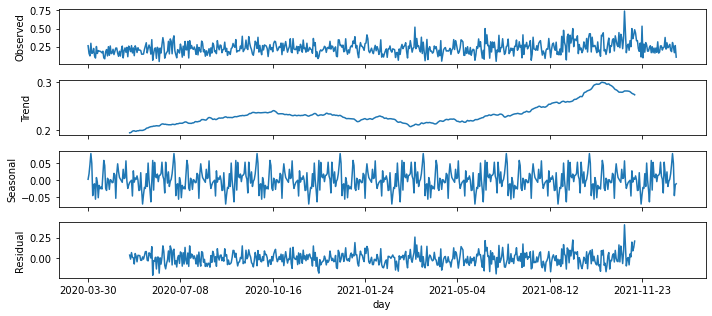

In [10]:
#Seasonality on negPercentage
sentimentsUS_negPercentage = sentimentsUK[['day','negPercentage']].dropna() #8 of them were NaN, so I dropped them


from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUS_negPercentage.set_index('day', inplace=True)
analysis = sentimentsUS_negPercentage[['negPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

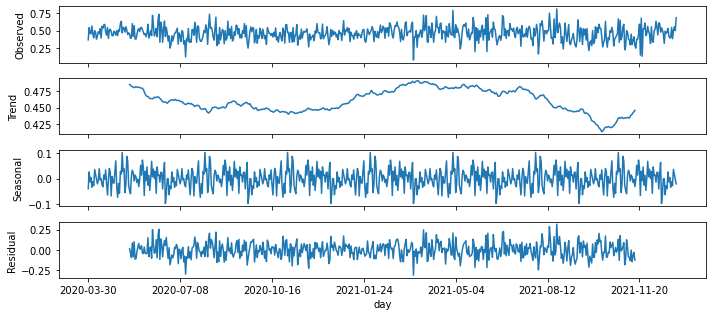

In [11]:
#Seasonality on netPercentage
sentimentsUK_netPercentage = sentimentsUK[['day','netPercentage']].dropna() #8 of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUK_netPercentage.set_index('day', inplace=True)
analysis = sentimentsUK_netPercentage[['netPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

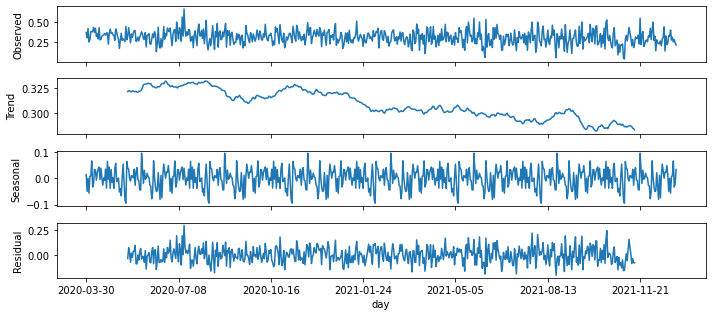

In [12]:
#Seasonality on posPercentage
sentimentsUK_posPercentage = sentimentsUK[['day','posPercentage']].dropna() #some of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUK_posPercentage.set_index('day', inplace=True)
analysis = sentimentsUK_posPercentage[['posPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

In [13]:
#covidData.plot("date","new_cases_smoothed")

In [14]:
#covidData.plot("date","new_deaths_smoothed")

In [15]:

#covidData.plot("date","hosp_patients")

In [16]:

#covidData.plot("date", "positive_rate")

# **Feature "new_deaths" is chosen to compare its trend with sentiment trends**

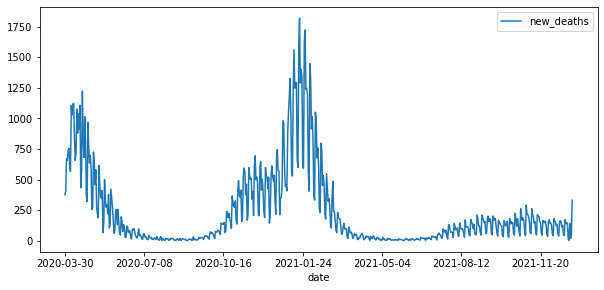

In [44]:
covidData.plot("date","new_deaths")

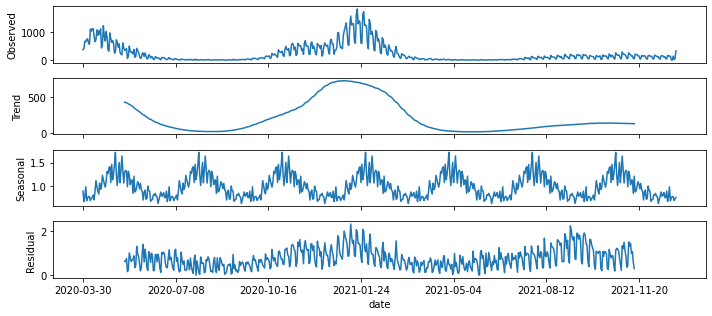

In [17]:
"""new_death Seasonality"""
covidDataUK_death = covidData[['date','new_deaths']].dropna() 
covidDataUK_death =covidDataUK_death.replace(0,0.001) # because seasonality can not be performed for zero values


from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUK_death.set_index('date', inplace=True)
analysis = covidDataUK_death[['new_deaths']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "new_cases" is chosen to compare its trend with sentiment trends**

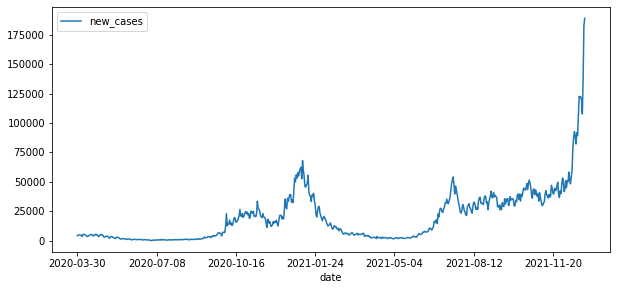

In [18]:
covidData.plot("date","new_cases")

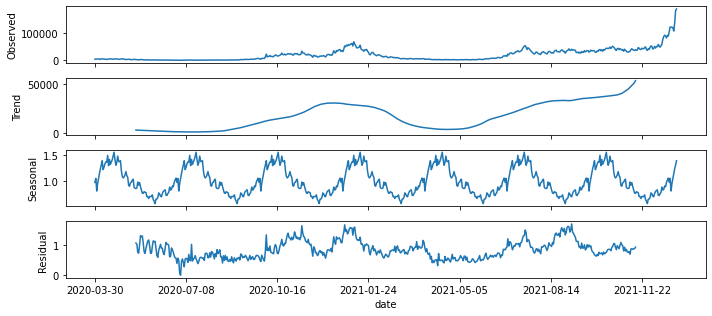

In [19]:
"""new_cases Seasonality"""
covidDataUK_case = covidData[['date','new_cases']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUK_case.set_index('date', inplace=True)
analysis = covidDataUK_case[['new_cases']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "hosp_patients" is chosen to compare its trend with sentiment trends**

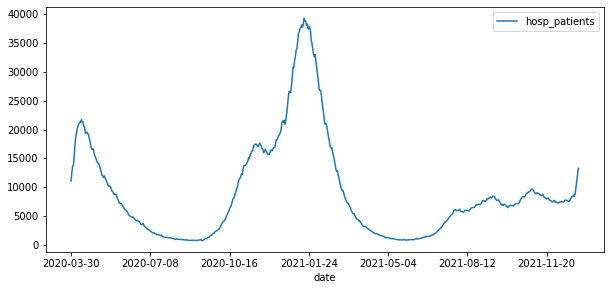

In [20]:
covidData.plot("date","hosp_patients")

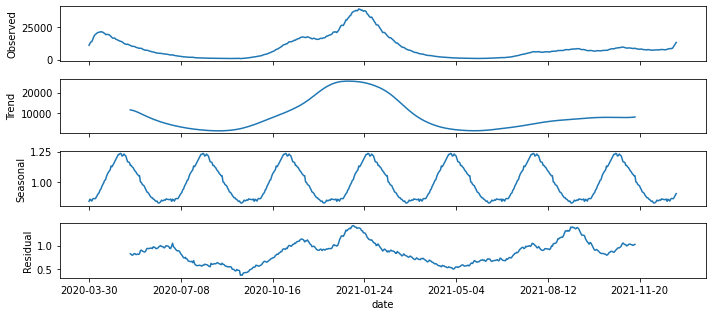

In [21]:
"""hosp_patients Seasonality"""
covidDataUK_hosp = covidData[['date','hosp_patients']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUK_hosp.set_index('date', inplace=True)
analysis = covidDataUK_hosp[['hosp_patients']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "new_vaccinations" is chosen to compare its trend with sentiment trends**

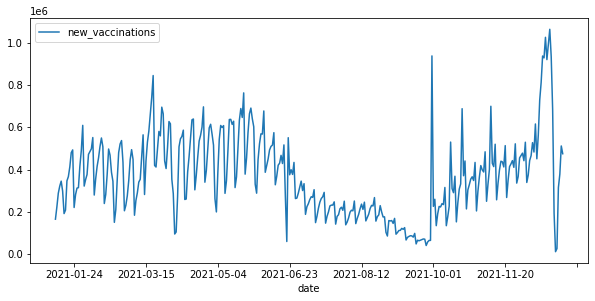

In [50]:
covidData.plot("date","new_vaccinations")

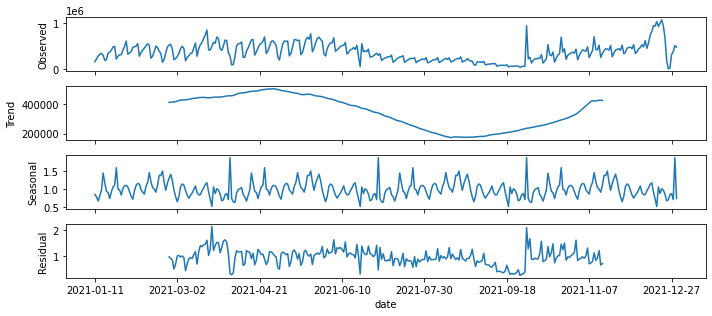

In [22]:
"""new_vaccinations Seasonality"""
covidDataUK_vacc = covidData[['date','new_vaccinations']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUK_vacc.set_index('date', inplace=True)
analysis = covidDataUK_vacc[['new_vaccinations']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "icu_patients" is chosen to compare its trend with sentiment trends**

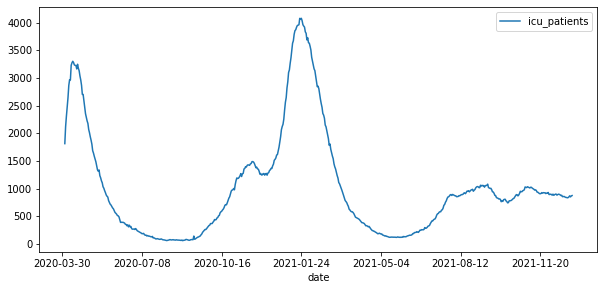

In [24]:
covidData.plot("date","icu_patients")

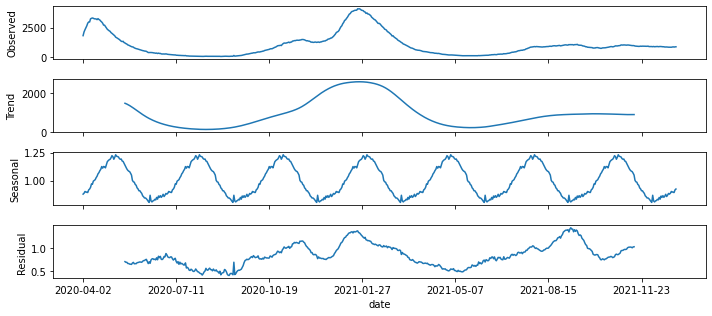

In [23]:
"""icu_patients Seasonality"""
covidDataUK_icu = covidData[['date','icu_patients']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUK_icu.set_index('date', inplace=True)
analysis = covidDataUK_icu[['icu_patients']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();